In [11]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Lambda
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D,UpSampling2D,Concatenate,Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.callbacks import LearningRateScheduler,Callback
from keras.optimizers import RMSprop
from keras.applications.resnet50 import ResNet50
import glob
import cv2
import os
#from pydot import *
from math import *
from keras.applications.vgg16 import VGG16 
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
from keras.utils import to_categorical
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from keras.preprocessing.image import ImageDataGenerator
get_ipython().run_line_magic('matplotlib', 'inline')
from keras.utils import plot_model
#from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [12]:
odmodel2 = ResNet50(weights='imagenet', input_shape = (752,674,3),  include_top=False)
print(odmodel2.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 752, 674, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 758, 680, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 376, 337, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 376, 337, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
plot_model(odmodel2, to_file='resnet50model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [6]:
odmodel = ResNet50(weights='imagenet', input_shape = (224,224,3),  include_top=False)


In [7]:
print(odmodel.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [2]:
def ODmodel():
    
    odmodel = ResNet50(weights='imagenet', input_shape = (224,224,3),  include_top=False)
    #print(odmodel.summary())
    #odmodel.layers.pop()
    
    for layer in odmodel.layers:
        layer.trainable = False
    
    
    inputs = odmodel.layers[0].output
    #conv53 = odmodel.layers[17].output
    
    #conv54 = UpSampling2D(size=(2,2))(conv53)
    #conv5_output = Conv2DTranspose(512,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(conv54)
    
    conv53 = odmodel.layers[141].output
    conv63 = odmodel.layers[173].output
    conv6_output = Conv2DTranspose(512,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(conv63)
    
    
    D01 = Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD01')(conv53)
    #drop11 = Dropout(0.2)(D11)
    D02 = BatchNormalization(axis = 3, name = 'bnD01')(D01)
    D03 = Activation('relu')(D02)
    D04 = Conv2D(512,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD02')(D03)
    #drop12 = Dropout(0.2)(D14)
    D05 = BatchNormalization(axis = 3, name = 'bnD02')(D04)
    D0_output = Activation('relu')(D05)
    
    conv43 = odmodel.layers[79].output
    D11 = Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD11')(conv43)
    #drop11 = Dropout(0.2)(D11)
    D12 = BatchNormalization(axis = 3, name = 'bnD11')(D11)
    D13 = Activation('relu')(D12)
    D14 = Conv2D(256,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD12')(D13)
    #drop12 = Dropout(0.2)(D14)
    D15 = BatchNormalization(axis = 3, name = 'bnD12')(D14)
    D1_output = Activation('relu')(D15)
    
    #conv33 = odmodel.layers[37].output
    #D21 = Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD21')(conv33)
   # drop21 = Dropout(0.2)(D21)
    #D22 = BatchNormalization(axis = 3, name = 'bnD21')(D21)
    #D23 = Activation('relu')(D22)
    #D24 = Conv2D(128,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD22')(D23)
    #drop22 = Dropout(0.2)(D24)
    #D25 = BatchNormalization(axis = 3, name = 'bnD22')(D24)
    #D2_output = Activation('relu')(D25)

    conv22 = odmodel.layers[4].output
    D31 = Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD31')(conv22)
   # drop31 = Dropout(0.2)(D31)
    D32 = BatchNormalization(axis = 3, name = 'bnD31')(D31)
    D33 = Activation('relu')(D32)
    D34 = Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer = 'he_uniform',name='convD32')(D33)
    #drop32 = Dropout(0.2)(D34)
    D35 = BatchNormalization(axis = 3, name = 'bnD32')(D34)
    D3_output = Activation('relu')(D35)
    
    decon01 = Concatenate()([D0_output,conv6_output])
    decon02 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv01')(decon01)
    decon03 = BatchNormalization(axis = 3, name = 'bnde01')(decon02)
    decon04 = Activation('relu')(decon03)
    decon05 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv02')(decon04)
    decon06 = BatchNormalization(axis = 3, name = 'bnde02')(decon05)
    decon07 = Activation('relu')(decon06)
    decon0_output = Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon07)
    
    decon11 = Concatenate()([D1_output,decon0_output])
    decon12 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv11')(decon11)
    decon13 = BatchNormalization(axis = 3, name = 'bnde11')(decon12)
    decon14 = Activation('relu')(decon13)
    decon15 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv12')(decon14)
    decon16 = BatchNormalization(axis = 3, name = 'bnde12')(decon15)
    decon17 = Activation('relu')(decon16)
    decon1_output = Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon17)
    #decon18 = UpSampling2D(size=(2,2))(decon17)
    #decon1_output = Conv2DTranspose(256,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(decon18)
    
    #decon21 = Concatenate()([D2_output,decon1_output])
    decon22 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv21')(decon1_output)
    decon23 = BatchNormalization(axis = 3, name = 'bnde21')(decon22)
    decon24 = Activation('relu')(decon23)
    decon25 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv22')(decon24)
    decon26 = BatchNormalization(axis = 3, name = 'bnde22')(decon25)
    decon27 = Activation('relu')(decon26)
    decon2_output =Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon27)
    #decon28 = UpSampling2D(size=(2,2))(decon27)
    #decon2_output = Conv2DTranspose(256,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(decon28)
    
    decon31 = Concatenate()([D3_output,decon2_output])
    decon32 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv31')(decon31)
    decon33 = BatchNormalization(axis = 3, name = 'bnde31')(decon32)
    decon34 = Activation('relu')(decon33)
    decon35 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv32')(decon34)
    decon36 = BatchNormalization(axis = 3, name = 'bnde32')(decon35)
    decon37 = Activation('relu')(decon36)
    decon3_output = Conv2DTranspose(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_uniform')(decon37)
    #decon38 = UpSampling2D(size=(2,2))(decon37)
    #decon3_output = Conv2DTranspose(256,(3,3),padding='same',strides=(1,1),kernel_initializer='he_uniform')(decon38)
    
    decon41 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv41')(decon3_output)
    decon42 = BatchNormalization(axis = 3, name = 'bnde41')(decon41)
    decon43 = Activation('relu')(decon42)
    decon44 = Conv2D(256,(3,3),strides=(1,1),padding = 'same',kernel_initializer = 'he_uniform',name='deconv42')(decon43)
    decon45 = BatchNormalization(axis = 3, name = 'bnde42')(decon44)
    decon4_output = Activation('relu')(decon45)
    
    decon5_output = Conv2D(1,(1,1),strides=(1,1),activation = 'linear',padding = 'same',kernel_initializer = 'he_uniform',name='decon51')(decon4_output)
    #decon52 = Flatten()(decon51)
    #decon5_output = Lambda(lambda x: x*255)(decon51)
    
    layers = decon5_output
    
    model = Model(inputs,layers,name = "ODModel")
    #print(model.get_weights())
    #model.load_weights(weights_path,by_name=True)
    #print(model.get_weights())
    
    print(model.summary())
    return model


In [ ]:
odmodel = ODmodel()

In [4]:
print(len(odmodel.layers))

231


In [5]:
od = VGG16(weights='imagenet', input_shape = (224,224,3),  include_top=False)

In [6]:
print(len(od.layers))

19


In [7]:
imgs_gt =[]
imgs_o = []
count_gt = 0
count_o = 0
for j in range(10):
    #print(j + 1)
    img_cnt = str(j + 1)
    img_path_gt = 'Images_for_FCRN/Random/img' + img_cnt + '/gt'
    img_path_o = 'Images_for_FCRN/Random/img' + img_cnt + '/o'
    for i in range((len(os.listdir(img_path_gt)))):
        cnt = str(i + 1)
        path_gt = img_path_gt + '/img' + img_cnt + '_' + cnt + 'gt.jpg'
        img_gt = cv2.imread(path_gt)
        img_gt = cv2.cvtColor(img_gt,cv2.COLOR_RGB2GRAY)
        if img_gt.shape == (224,224):
            imgs_gt.append(img_gt)
            count_gt = count_gt + 1
        path_o = img_path_o + '/img' + img_cnt + '_' + cnt + 'o.jpg'
        img_o = cv2.imread(path_o)
        if img_o.shape == (224,224,3):
            imgs_o.append(img_o)
            count_o = count_o + 1
print(count_gt,' ',count_o)
imgs_gt = np.asarray(imgs_gt)
imgs_gt = imgs_gt.reshape((3477,224,224,1))
imgs_o = np.asarray(imgs_o)
print(imgs_gt.shape)
print(imgs_o.shape)


3477   3477
(3477, 224, 224, 1)
(3477, 224, 224, 3)


In [8]:
class LossHistory(Callback):
    def on_train_begin(self,logs={}):
        self.losses=[]
        self.lr = []
        
    def on_epoch_end(self,batch,logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))

In [9]:
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.1
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

lrate = LearningRateScheduler(exp_decay)


In [10]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [11]:
loss_history = LossHistory()
#callbacks_list = [loss_history,lrate,plot]
callbacks_list = [loss_history,plot]

In [12]:
lr_rate = 0.01
decay_rate = lr_rate/200;

my_optimizer = RMSprop(lr = 0.01,epsilon=None,decay = decay_rate)
odmodel.compile(optimizer=my_optimizer, loss='mean_squared_error',metrics = ["accuracy"])

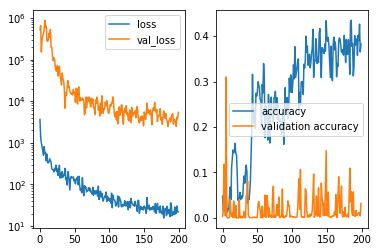

In [13]:
odmodel.fit(imgs_o[1:200],imgs_gt[1:200],validation_split = 0.2,epochs=200,callbacks=callbacks_list,batch_size=8)

In [14]:
odmodel.save('resnet_d2_200images.h5')